# CSIT456 Lab 2: Linear Model for Regression

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10


We will be using a very popular advertising dataset about various costs incurred on advertising by different mediums and the sales for a particular product. 

In [2]:
ad = pd.read_csv('Advertising.csv',index_col=0) 
ad[ad.columns[0]]
ad

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


### Plot and describe the data set

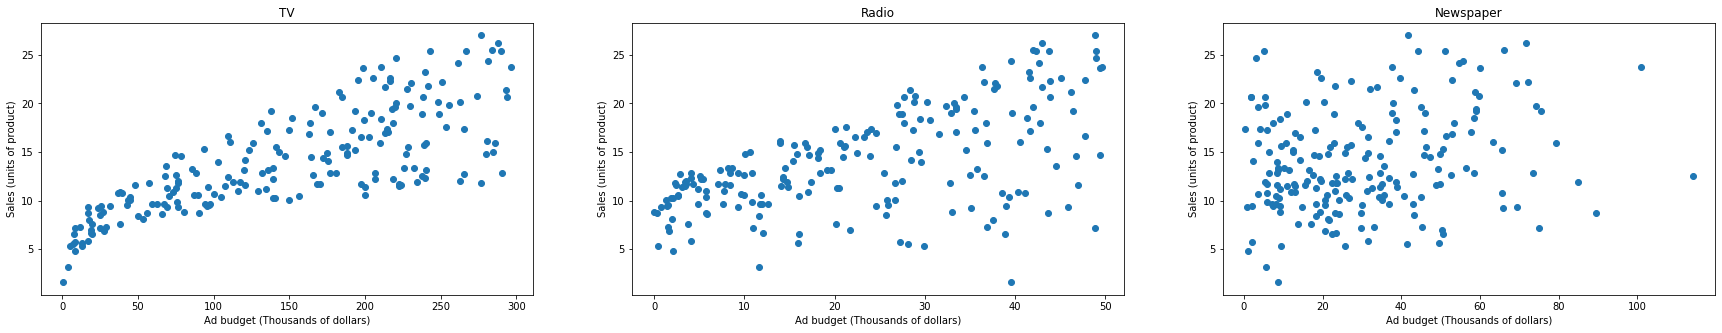

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(30,5))
for i,ax in enumerate (axes.ravel()):
    ax.scatter (x=ad[ad.columns[i]],y=ad["Sales"])
    ax.set_title(ad.columns[i])
    ax.set_xlabel('Ad budget (Thousands of dollars)')
    ax.set_ylabel('Sales (units of product)')
    

In [4]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Question 1 [5 points] 
Convert the format of the data set and split it to predictors and variables

1. Predictor variables:
Create the numpy ndarray **X** which contains the data of the columns 'TV', 'Radio', and 'Newspaper' in **ad**.
2. Target variable:
Create the numpy ndarray **y** which contains the data of the columns 'Sales' in **ad**. Note that **y** should be a vector with 200 rows and 1 column. 

In [5]:
X= ad.drop('Sales', axis=1).values
y= ad['Sales'].values.reshape(-1,1) #reshape is used to put everything in one column, or else it'll be all over
#another way: ad[['TV','Radio', 'Newspaper']].values
y.shape

(200, 1)

### Question 2 Fitting a linear regression model for one feature: TV cost VS Sales

#### Question 2.1 [5 points]
Prepare the data as the following steps:
1. Create **X_tv** for the values of the cost in TV, which should be the data in the first column of **X**.
2. Split the data to train set (70%) and test set (30%). 

In [6]:
X_tv = X[:, 0].reshape(-1,1)
from sklearn.model_selection import train_test_split
X_tv_train, X_tv_test, y_train, y_test = train_test_split(X_tv, y, test_size = 0.3, random_state = 42)

#### Question 2.2 [5 points]
Create a linear regression model that outputs a predication of sales based on the advertisement cost on TV.

Print the score of your model as well.

In [8]:
from sklearn.linear_model import LinearRegression
reg_tv = LinearRegression()
reg_tv.fit(X_tv_train,y_train)
reg_tv.score(X_tv_test, y_test)

0.6714477229302763

#### Question 2.3 [5 points]
Use your model to plot the advertisement cost on TV versus the sales. 

Set the range of the cost between 0 and 300.

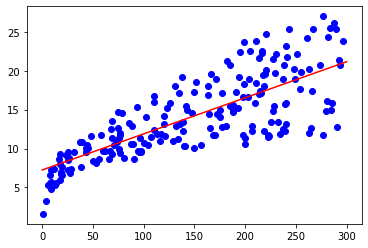

In [9]:
prediction_x = np.linspace(0,300).reshape(-1,1)
prediction_y = reg_tv.predict(prediction_x)

plt.scatter(X_tv, y, color='blue')
plt.plot(prediction_x, prediction_y, color= 'red')

### Question 3. Multiple regression models for all features

#### Question 3.1 [5 points]
Prepare the data as the following steps:
Split X to train set (70%) and test set (30%). 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Question 3.2 [5 points] Apply Linear regression
Create a linear regression model **reg** based on the train set.

In [15]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Question 3.3 [8 points] Apply Ridge regression
Create a ridge regression model **ridge** based on the train set. Use grid search and 10-fold cross-validation to select the best value of **alpha**. Set the range of **alpha** from 0.001 to 10.

In [18]:
from sklearn.linear_model import Ridge
param_grid = {"alpha": np.logspace(-3,1,20)}
print(param_grid)

{'alpha': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01])}


In [21]:
from sklearn.model_selection import GridSearchCV
grid_ridge = GridSearchCV(Ridge(), param_grid, cv= 10, return_train_score= True)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [24]:
best_ridge_param = grid_ridge.best_params_
best_ridge_param

{'alpha': 10.0}

In [32]:
ridge = Ridge(alpha= best_ridge_param['alpha'])
ridge.fit(X_train, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Question 3.4 [8 points] Apply Lasso regression
Create a Lasso regression model **lasso** based on the train set. Use grid search and 10-fold cross-validation to select the best value of **alpha**. 

In [26]:
from sklearn.linear_model import Lasso
grid_lasso = GridSearchCV(Lasso(), param_grid, cv= 10, return_train_score= True)
grid_lasso.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [34]:
best_lasso_param = grid_lasso.best_params_
best_lasso_param

{'alpha': 1.438449888287663}

In [35]:
lasso = Lasso(alpha= best_lasso_param['alpha'])
lasso.fit(X_train, y_train)

Lasso(alpha=1.438449888287663, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Question 3.5 [4 points] Compare the scores of three linear models
Test each model by the test set and get the scores (coefficient of determination R^2 of the prediction). 

In [38]:
reg.score(X_test, y_test)

0.8609466508230368

In [39]:
ridge.score(X_test, y_test)

0.8609851905762931

In [40]:
lasso.score(X_test, y_test)

0.8668412383791525